# load dataset and necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape # check the shape of our dataset

(891, 12)

In [5]:
data.describe() # statistical information

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum() # since there is null value in our dataset 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data = data.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1) # dropping those colums as they are of no use

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) # filling the null values with mean and mode

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
data.isnull().sum() # we have successfully filled up all the null values and we can procedd ahead

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder  # convert our object data type to float as our machine learning model dont understand object dataype
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for i in cols:
    data[i] = le.fit_transform(data[i])

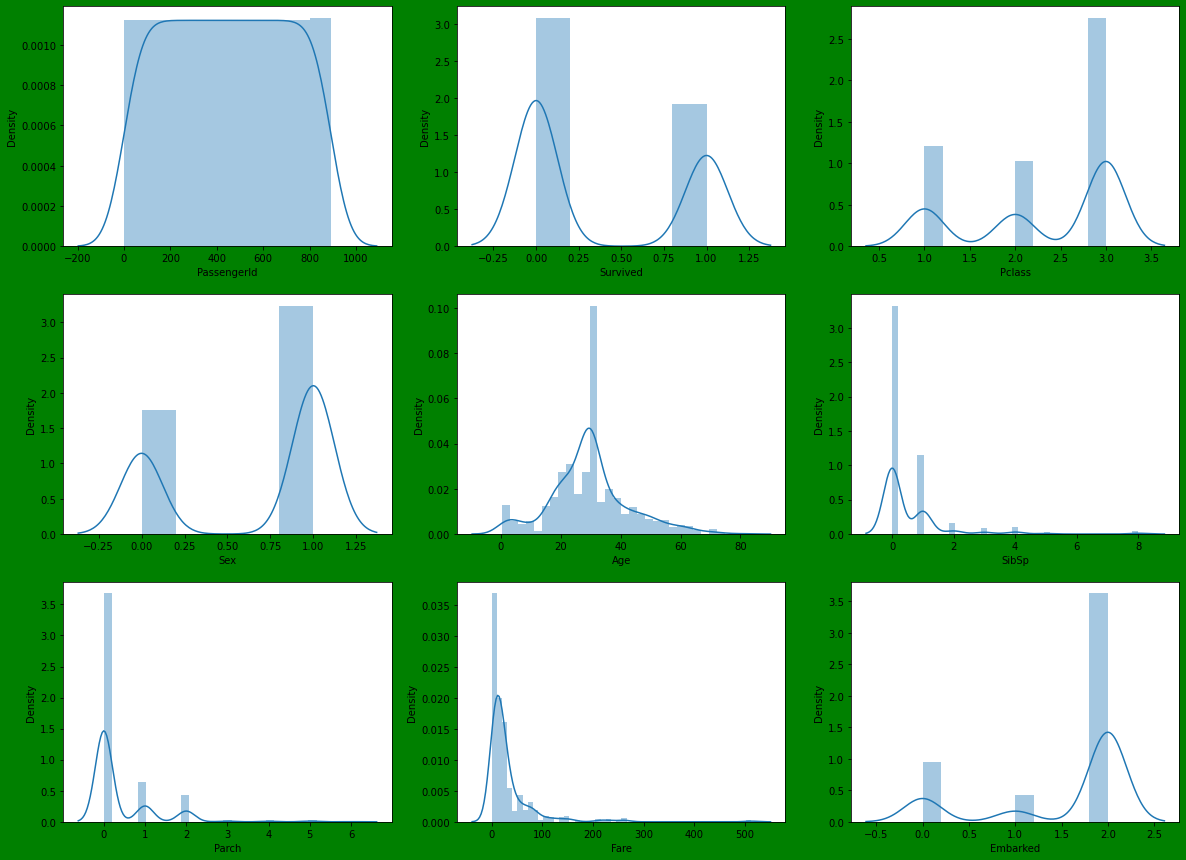

In [14]:
# plooting distribution plot
plt.figure(figsize = (20, 15), facecolor = 'green')
graph = 1

for column in data:
    if graph <=9:
        ax = plt.subplot(3, 3, graph)
        sns.distplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.show()

In [15]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


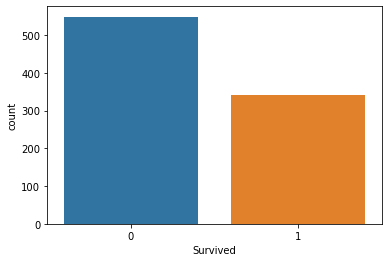

In [16]:
# plotting count plot 
sns.countplot(x='Survived', data=data)
plt.show()


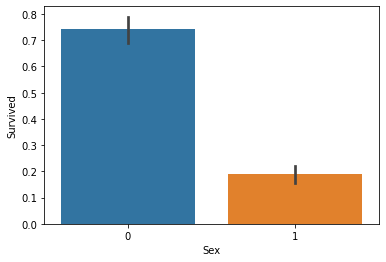

In [17]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()


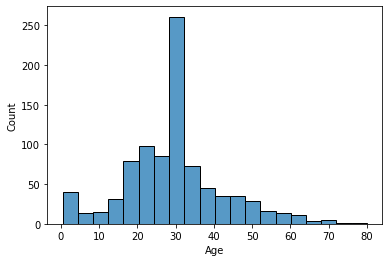

In [18]:
sns.histplot(x='Age', data=data, bins=20)
plt.show()


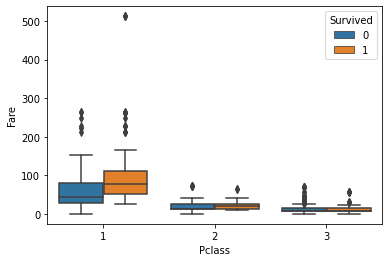

In [19]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data)
plt.show()


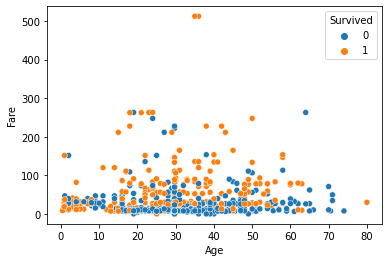

In [20]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.show()


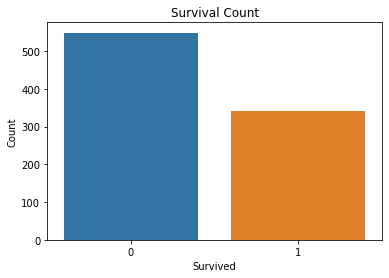

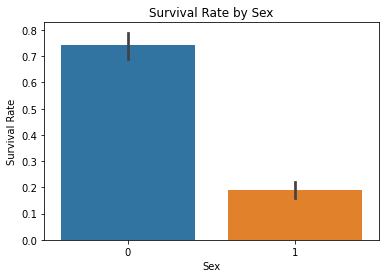

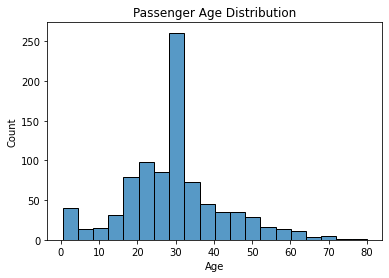

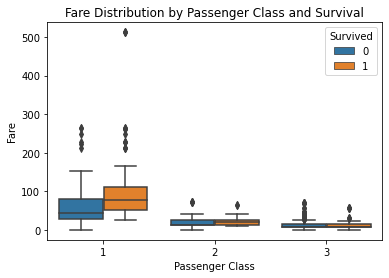

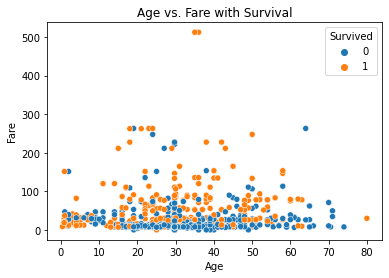

In [21]:
# Countplot to Visualize the count of survivors and non-survivors
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Barplot to Display the survival rate based on sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Histogram to Plot the distribution of passenger ages
sns.histplot(x='Age', data=data, bins=20)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot for Visualize the relationship between survival and passenger class
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data)
plt.title('Fare Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Scatterplot for relationship between age, fare, and survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Age vs. Fare with Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


# training and testing of our dataset

In [22]:
x = data.drop(['Survived'], axis = 1)

y = data['Survived']

In [23]:
# scaling out datset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['FEATURES'] = x.columns
vif

,VIF,FEATURES
0,1.007572,PassengerId
1,1.672534,Pclass
2,1.111141,Sex
3,1.205739,Age
4,1.286613,SibSp
5,1.323890,Parch
6,1.648801,Fare
7,1.079669,Embarked


In [ ]:
# as we can see no multi-colinearity exist in our dataset so we can proceed ahaed to train our model

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 94)

In [27]:
def model_testing(algorithm , x_train, x_test, y_train, y_test):
    algorithm.fit(x_train, y_train)
    train_score = algorithm.score(x_train, y_train)
    print('training R2 score', train_score)
    test_score = algorithm.score(x_test, y_test)
    print('testing R2 score', test_score)

In [28]:
# importing all the necessary libararies

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [29]:
# creating instance for each algorithm
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC()
model5 = KNeighborsClassifier()
model6 = GradientBoostingClassifier()



In [30]:
model_testing(model1, x_train, x_test, y_train, y_test)

training R2 score 0.8068862275449101
testing R2 score 0.7847533632286996


In [31]:
model_list = [model1, model2, model3, model4, model5, model6,]

In [32]:
for model in model_list:
    print(model, model_testing(model, x_train, x_test, y_train, y_test), '\n\n')

training R2 score 0.8068862275449101
testing R2 score 0.7847533632286996
LogisticRegression() None 


training R2 score 1.0
testing R2 score 0.7354260089686099
DecisionTreeClassifier() None 


training R2 score 1.0
testing R2 score 0.8026905829596412
RandomForestClassifier() None 


training R2 score 0.8517964071856288
testing R2 score 0.7937219730941704
SVC() None 


training R2 score 0.8637724550898204
testing R2 score 0.7982062780269058
KNeighborsClassifier() None 


training R2 score 0.9176646706586826
testing R2 score 0.7937219730941704
GradientBoostingClassifier() None 




In [ ]:
# as we can see training and testing score of random forest classifier is good among others

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(x, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8215868432615656


In [35]:
final_model = RandomForestClassifier(max_depth= 10, min_samples_split = 5, n_estimators = 100)

In [36]:
final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [37]:
y_pred_train = final_model.predict(x_train)
y_pred_test = final_model.predict(x_test)
accuracy_train = metrics.r2_score(y_train, y_pred_train)
accuracy_test = metrics.r2_score(y_test, y_pred_test)

In [38]:
print('R square score on train data', accuracy_train)
print('R square score on test data', accuracy_test)
print('R square score on train data after hyperparameter tuning', accuracy_train)
print('R square score on test data after hyperparameter tuning', accuracy_test)

R square score on train data 0.7391494833087291
R square score on test data 0.21465705181955352
R square score on train data after hyperparameter tuning 0.7391494833087291
R square score on test data after hyperparameter tuning 0.21465705181955352


In [39]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       134
           1       0.82      0.67      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [40]:
from sklearn.metrics import classification_report

In [41]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred_test)

In [42]:
print('Thresolds:', thresolds)
print('True positive rate:', tpr)
print('False positive rate:', fpr)

Thresolds: [2 1 0]
True positive rate: [0.        0.6741573 1.       ]
False positive rate: [0.         0.09701493 1.        ]


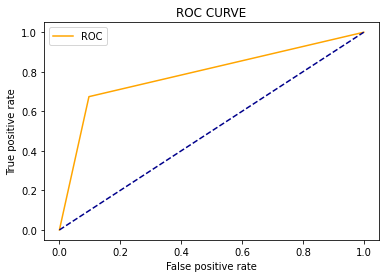

In [43]:
plt.plot(fpr, tpr, color = 'orange', label = "ROC")
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [44]:
auc_score = roc_auc_score(y_test, y_pred_test)
print(auc_score)

0.7885711889988261


# SAVE OUR MODEL

In [45]:
final_model = RandomForestClassifier(max_depth= 10, min_samples_split = 5, n_estimators = 100)
final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [46]:
import joblib

In [47]:
joblib.dump(final_model, "model_name")

['model_name']

In [48]:
survival_prediction = joblib.load('model_name')

In [49]:
data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.25,2


In [60]:
import pandas as pd

# Create a DataFrame with five data points
new_data = pd.DataFrame({
    'PassengerId': [2, 2, 3, 4, 5],
    'Parch' : [0 , 0, 1, 0, 0],
    'Pclass': [1, 1, 1, 1, 3],
    'Sex': ['1', '1', '0', '1', '0'],
    'Age': [38, 35, 18, 50, 40],
    'SibSp': [1, 1, 3, 1, 0],
    'Fare': [71.2, 81.2, 4.87, 7.3, 8.9],
   'Embarked': ['0', '0', '2', '0', '2']
})

predictions = survival_prediction.predict(new_data)


print(predictions)



[0 0 0 0 0]
